In [2]:
# import required modules:
import matplotlib.pyplot as plt # to make plots
import numpy as np # for array manipulation and math functions
import scipy.signal as scs # for signal analysis
import glob # for finding files
import os as os
import warnings
import array as arr
from scipy import optimize
from scipy.optimize import curve_fit
# import fit models from the lmfit package
from lmfit.models import ExponentialModel, GaussianModel, PolynomialModel
# insert the path to your Data here5
datapath = "./Daten/"
# Konstanten
c0                  = 299792458             # Vakuum Lichtgeschwindigkeit
#h                   = 6.626e-34             # Plank'sches Wirkungsquantum
hbar                = 6.626e-34/(2*np.pi)   # Reduzierte Plank-Konstante
e                  = 1.6022e-19            # Elektronenvolt
def Fehler_I(I_0,I,Ier,I_0er,U):
    h=0
    for u in U:
        if (I[h]-I_0)!=0.0:
            Ier[h]=np.sqrt((0.5*Ier[h]*0.001/np.sqrt((I[h]-I_0)*0.001))**2+(0.5*I_0er*0.001/np.sqrt((I[h]-I_0)*0.001))**2)
        else:
            Ier[h]=np.sqrt((Ier[h]+I_0er)*0.01)
        h=h+1
    return Ier

In [6]:
pip install codemirror

ERROR: Could not find a version that satisfies the requirement codemirror (from versions: none)
ERROR: No matching distribution found for codemirror
Note: you may need to restart the kernel to use updated packages.


[array([0.   , 0.051, 0.148, 0.1  , 0.202, 0.302, 0.402, 0.511, 0.61 ,
       0.704, 0.808, 1.016, 1.204, 1.516, 1.694, 2.   , 2.346, 2.8  ,
       0.   , 0.244, 0.504, 0.741, 0.992, 1.258, 1.498, 1.713, 2.135,
       2.803]), array([0.   , 0.109, 0.256, 0.4  , 0.602, 0.804, 1.021, 1.153, 1.295,
       1.385, 1.471, 2.016, 2.801, 0.   , 0.203, 0.395, 0.61 , 0.791,
       1.009, 1.196, 1.385, 1.803, 2.251, 2.802]), array([0.   , 0.153, 0.296, 0.451, 0.608, 0.759, 0.912, 1.11 , 1.42 ,
       2.057, 2.801, 0.   , 0.152, 0.3  , 0.45 , 0.599, 0.758, 0.898,
       1.061, 1.199, 1.581, 2.201, 2.802]), array([0.   , 0.101, 0.202, 0.304, 0.397, 0.504, 0.571, 0.673, 0.806,
       1.556, 1.997, 2.801, 0.   , 0.101, 0.207, 0.302, 0.404, 0.503,
       0.611, 0.706, 1.301, 2.018, 2.802]), array([0.   , 0.108, 0.198, 0.302, 0.4  , 0.505, 0.605, 1.224, 2.024,
       2.8  , 0.   , 0.103, 0.2  , 0.303, 0.402, 0.507, 0.61 , 1.041,
       1.931, 2.802]), array([0.   , 0.243, 0.501, 0.742, 0.994, 1.239, 1.

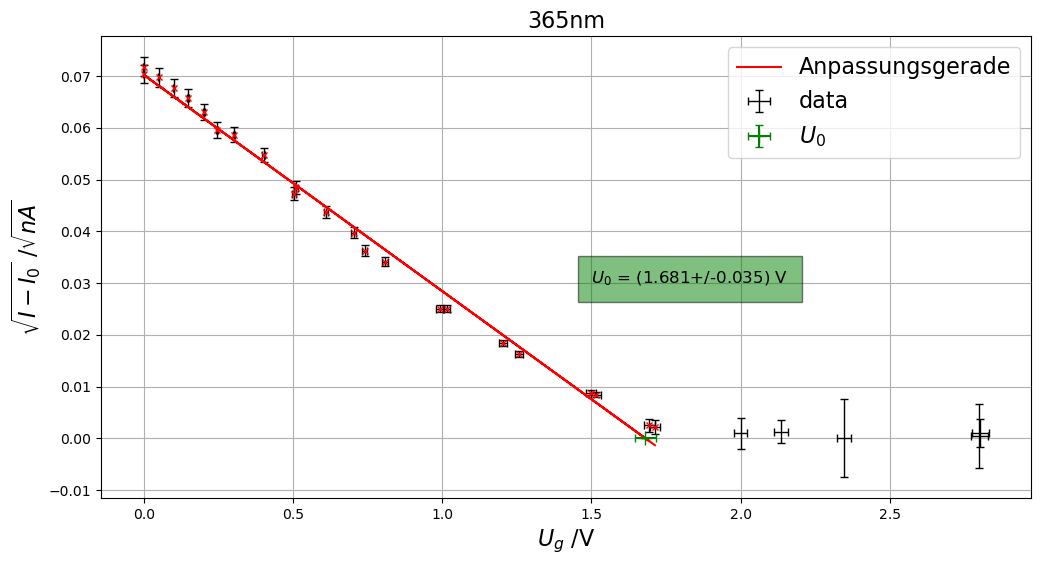

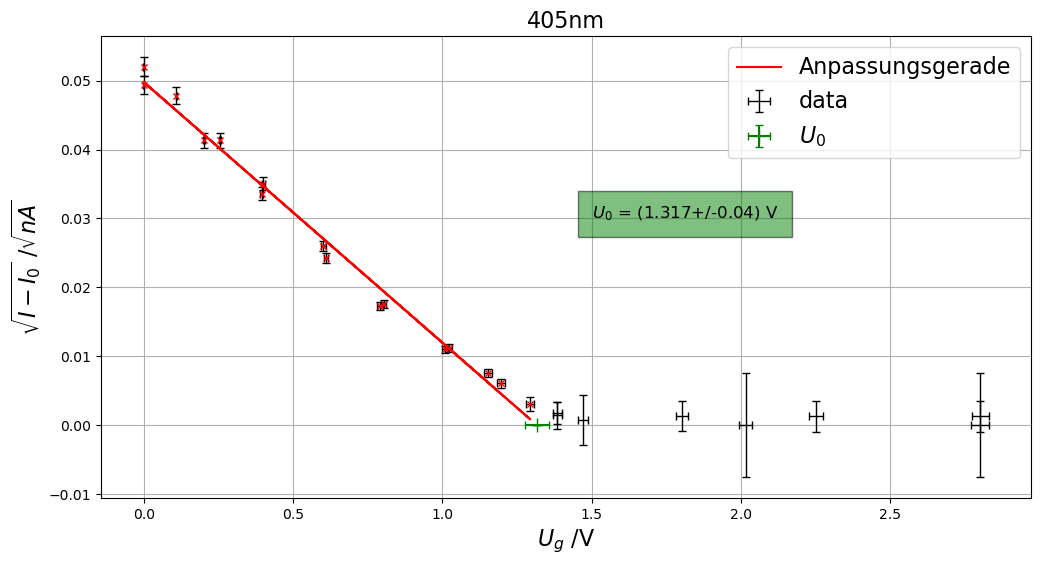

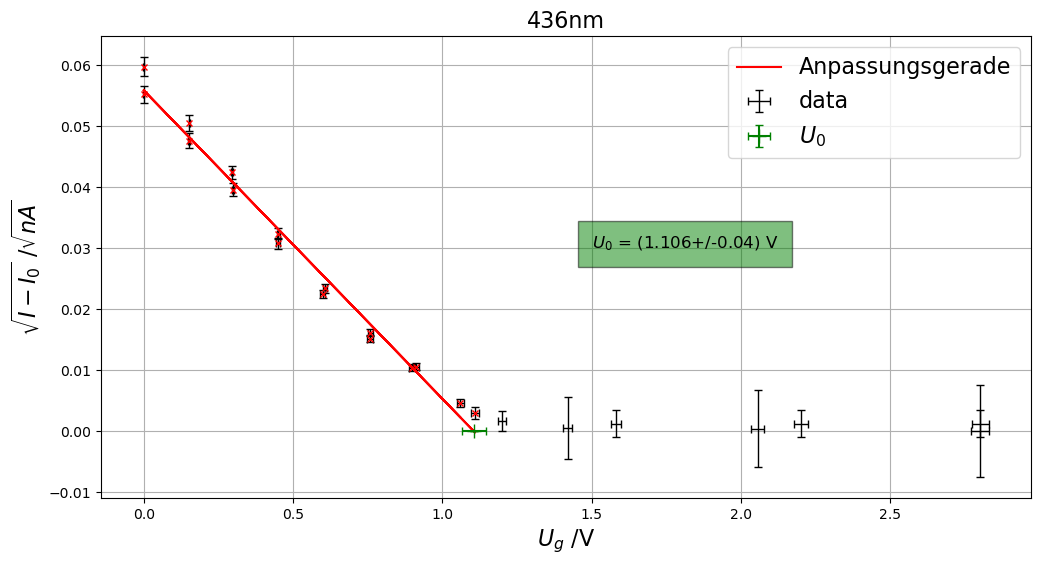

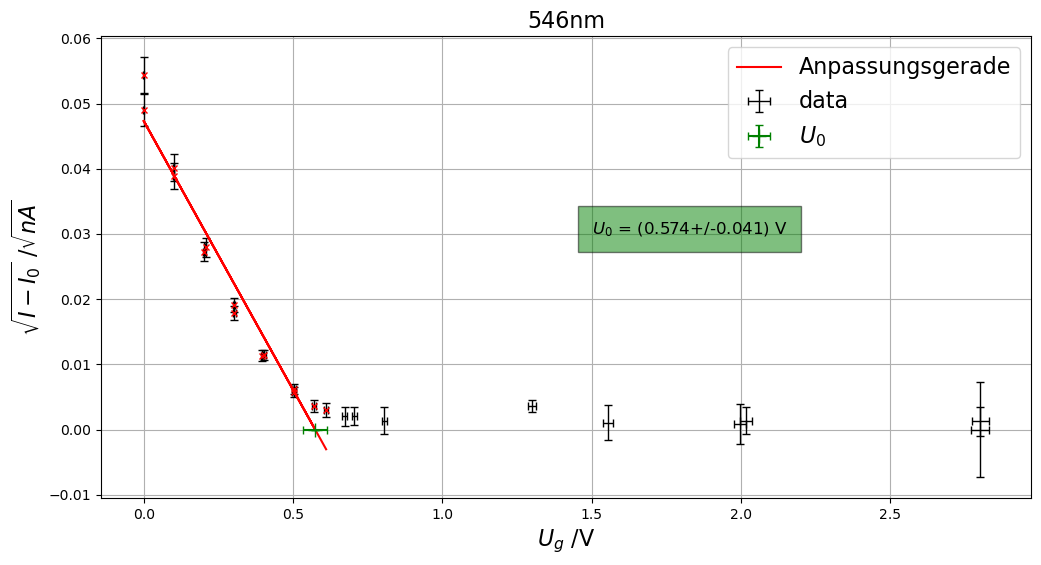

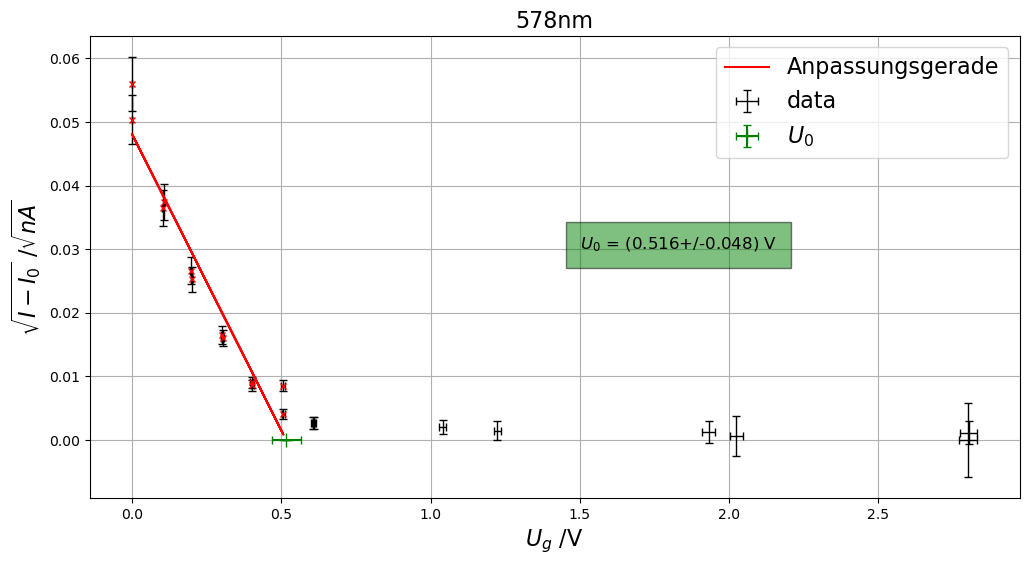

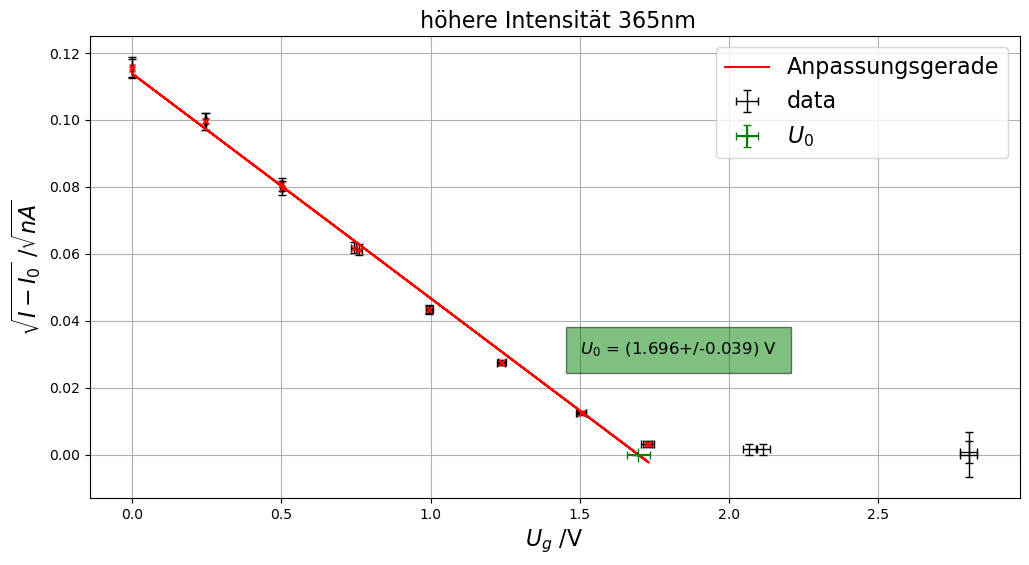

In [5]:
d1=np.loadtxt('./365.txt')
d2=np.loadtxt('./405.txt')
d3=np.loadtxt('./436.txt')
d4=np.loadtxt('./546.txt')
d5=np.loadtxt('./578.txt')
d6=np.loadtxt('./365_2.txt')
Data=[d1,d2,d3,d4,d5,d6]
WL=['365','405','436','546','578',' höhere Intensität 365']
WL2=[365,405,436,546,578,365]
U0=[1734,1384.5,1165.5,639.5,530.5,1758]
#I0=[30.75,20.05,27.25,47.8,10.1]
I0=[0.002,0.0023,0.0018,-0.0008,-0.0103,-0.009]
I0r=[]
U=[]
errU=[1,1,1,1,1,1]
I=[]
errI=[0.05,0.05,0.05,0.1,0.15,0.05]
U2=[]
I2=[]
I2_=[]
Ur=[]
Ir=[]
U2r=[]
I2r=[]
for h in range(0,6):
    U.append(Data[h][:,0])
    I0r.append(I0[h]*0.05)
    I.append(Data[h][:,1])
    Ur.append(U[h]*0.01+errU[h])
    Ir.append(I[h]*errI[h]+0.0055)
    U2.append([i*0.001 for i in U[h] if i<=U0[h]])
    U2r.append([(i*0.01+errU[h])*0.001 for i in U[h] if i<=U0[h]])
    I22=[]
    I22_=[]
    I22r=[]
    count=0
    for i in U[h]:
        if i<=U0[h]:
            I22.append(I[h][count])
            I22_.append((I[h][count]-I0[h])*0.001)
            I22r.append(Ir[h][count])
        count=count+1
    I2.append(I22)
    I2_.append(I22_)
    I2r.append(I22r)

#print(I)
for h in range(0,6):
    #Ir[h]=np.sqrt((0.5*Ir[h]*0.001/np.sqrt((I[h]-I0[h])*0.001))**2+(0.5*I0r[h]*0.001/np.sqrt((I[h]-I0[h])*0.001))**2)
    Ir[h]=Fehler_I(I0[h],I[h],Ir[h],I0r[h],U[h])
    I[h]=np.sqrt((I[h]-I0[h])*0.001)
    I2[h]=Fehler_I(I0[h],I2[h],I2r[h],I0r[h],U2[h])
    I2[h]=np.sqrt(I2_[h])
    U[h]=U[h]*0.001
    Ur[h]=Ur[h]*0.001

def funktion(x,b,m):
    y=m*x+b
    return y
U_0_save=[]
U_0_save_err=[]
print(U)
for h in range(0,6):
    s=[]
    anpassungs_werte, co_var = curve_fit(funktion, U2[h],I2[h])
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for u in U2[h]:
        Rfit.append(funktion(u, *anpassungs_werte))    
    U_0_save.append(-anpassungs_werte[0]/anpassungs_werte[1])
    U_0_save_err.append(np.sqrt((perr[0]/anpassungs_werte[1])**2+(perr[1]*anpassungs_werte[0]/(anpassungs_werte[1]**2))**2))
    plt.figure(figsize=(12,6))
    plt.title(str(WL[h])+r'nm',fontsize=16)
    G3label  = r"$U_0$ = $($" + str(np.round(U_0_save[h], 3)) + r"+/-" + str(np.round(U_0_save_err[h], 3)) + r"$)$ V"
    plt.text( 1.5,0.03, G3label, bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 10}, fontsize = 12)
    plt.errorbar(U[h],I[h],Ir[h],Ur[h],'k.',capsize=3,elinewidth=1,markersize=0,label='data')
    plt.plot(U2[h],I2[h],'r x',markersize=5)
    plt.plot(U2[h],Rfit,'r',label='Anpassungsgerade')
    plt.errorbar(U_0_save[h],0.0,0.0,U_0_save_err[h],'g +',capsize=3,elinewidth=1.5,markersize=10,label='$U_0$')
    plt.ylabel(r'$\sqrt{I-I_0}$ /$\sqrt{nA}$',fontsize=16)
    plt.xlabel(r'$U_g$ /V',fontsize=16)
    plt.grid()
    plt.legend(fontsize=16)
    #string(n)=('%d' %n)
    plt.savefig(str(WL[h])+'nm')
print(U_0_save)
print(U_0_save_err)
#plt.plot(U2[0],np.sqrt(I2[0]),'g x')
#plt.show

[365, 405, 436, 546, 578, 365]
[1.6808694466521494, 1.3171822691915511, 1.1059500226207155, 0.5742287928566299, 0.5161411843675587, 1.6957619829763646]
Durch die Anpassung bestimmte Parameter: [-8.90189272e-22 -5.83832885e-19] +/- [7.60398878e-23 3.47457496e-20] nm


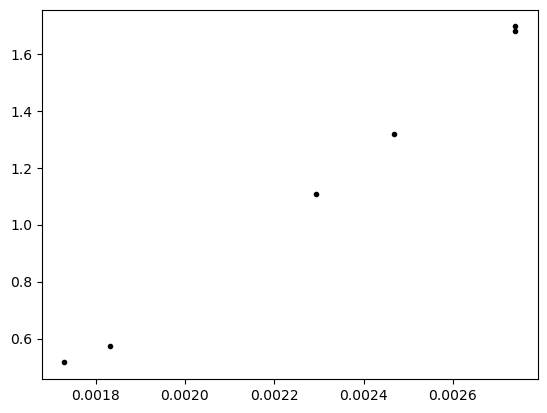

In [4]:
def grad(wl,h,W_a):
    U_0=h/e*wl-W_a/e
    return U_0
print(WL2)
V=U_0_save
print(V)
s=[]
anpassungs_werte, co_var = curve_fit(grad, WL2, U_0_save)
perr= np.sqrt(np.diag(co_var))
print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
#Rfit    = funktion(U2[h], *anpassungs_werte)
Rfit=[]
for u in WL2:
    Rfit.append(grad(u, *anpassungs_werte))  
for h in range(0,6):
    WL2[h]=1/WL2[h]
plt.plot(WL2,U_0_save,'k.')
#plt.plot(WL2,Rfit,'g')